In [2]:
import pylab as pl
import numpy as np

In [3]:
# make swissroll data
def swissroll():
    N = 1000
    noise = 0.05
    t = 3 * np.pi / 2 * (1 + 2 * np.random.rand(1, N))
    h = 21 * np.random.rand(1, N)
    data = np.concatenate((t * np.cos(t), h, t * np.sin(t))) + noise * np.random.randn(3, N)
    return np.transpose(data), np.squeeze(t)

In [4]:
# LLE function
def LLE(data, nRedDim=2, K=12):
    ndata = np.shape(data)[0]
    ndim = np.shape(data)[1]
    d = np.zeros((ndata, ndata), dtype=float)
    for i in range(ndata):
        for j in range(i + 1, ndata):
            for k in range(ndim):
                d[i, j] += (data[i, k] - data[j, k]) ** 2
            d[i, j] = np.sqrt(d[i, j])
            d[j, i] = d[i, j]

    indices = d.argsort(axis=1)
    neighbours = indices[:, 1:K + 1]
    W = np.zeros((K, ndata), dtype=float)

    for i in range(ndata):
        Z = data[neighbours[i, :], :] - np.kron(np.ones((K, 1)), data[i, :])
        C = np.dot(Z, np.transpose(Z))
        C = C + np.identity(K) * 1e-3 * np.trace(C)
        W[:, i] = np.transpose(np.linalg.solve(C, np.ones((K, 1))))
        W[:, i] = W[:, i] / np.sum(W[:, i])

    M = np.eye(ndata, dtype=float)
    for i in range(ndata):
        w = np.transpose(np.ones((1, np.shape(W)[0])) * np.transpose(W[:, i]))
        j = neighbours[i, :]
        ww = np.dot(w, np.transpose(w))
        for k in range(K):
            M[i, j[k]] -= w[k]
            M[j[k], i] -= w[k]
            for l in range(K):
                M[j[k], j[l]] += ww[k, l]
    evals, evecs = np.linalg.eig(M)
    ind = np.argsort(evals)
    y = evecs[:, ind[1:nRedDim + 1]] * np.sqrt(ndata)
    return evals, evecs, y



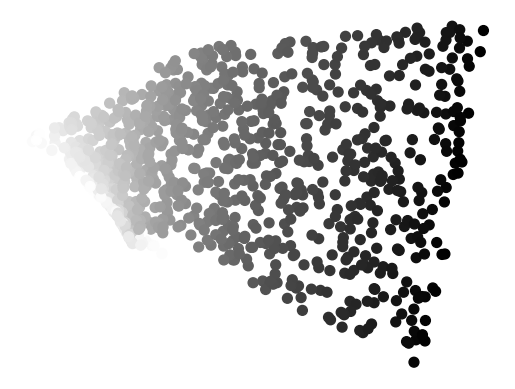

In [5]:
# visualization
data, t = swissroll()
evals, evecs, y = LLE(data)

t2= t.min()
t3= t.max()
t = (t-t2) / (t3-t2)
pl.scatter(y[:, 0], y[:, 1], s=50, c=t, cmap=pl.cm.gray)
pl.axis('off')
pl.show()

#### Library

In [15]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# create sample dataset

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)


LocallyLinearEmbedding(n_neighbors=10, random_state=42)

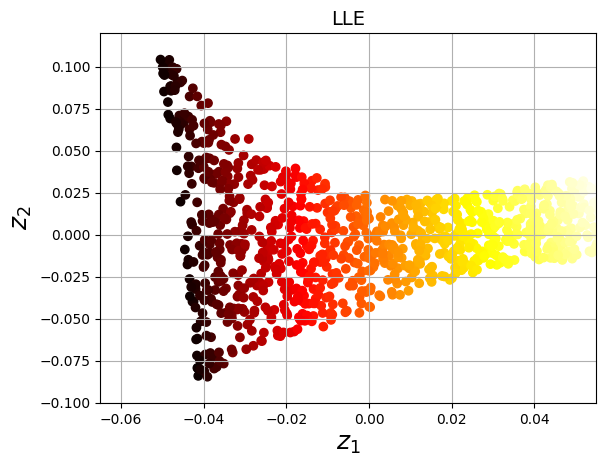

In [16]:
X_reduced = lle.transform(X)

plt.title("LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)   
plt.show()


###### reference
###### https://woosikyang.github.io/first-post.html
###### https://excelsior-cjh.tistory.com/168